In [222]:
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset

In [223]:
# My goal with this implementation is to build a vectorized logistic regression model from scratch
# to better my understanding of the underlying principles and gain intuition into building neural networks.

# Load data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

(209, 64, 64, 3)


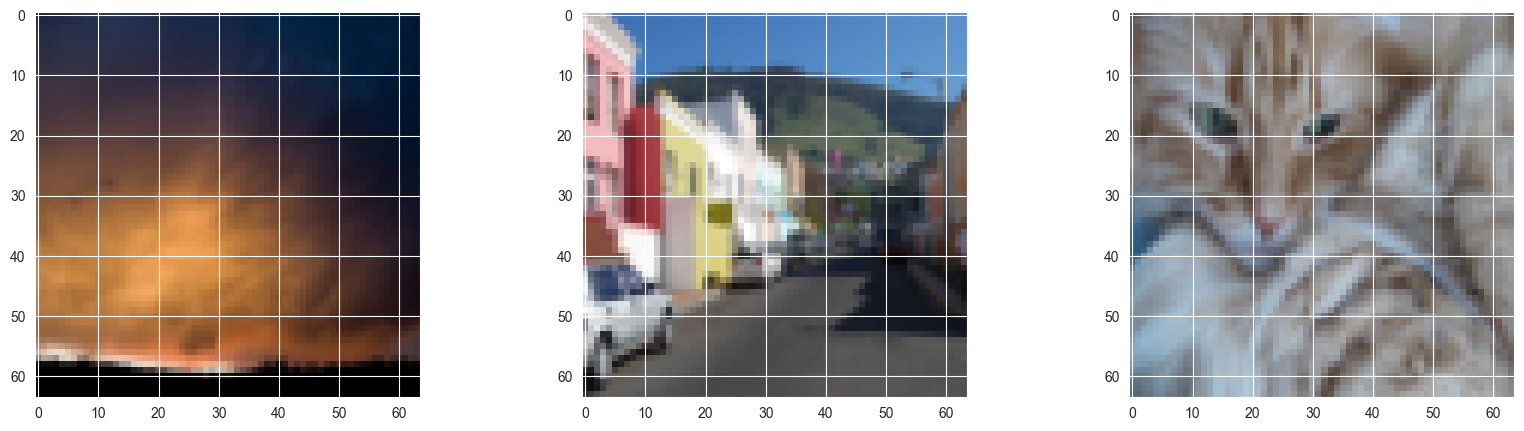

In [224]:
# We have 209 cat or no-cat images, each 64 by 64 pixels each
print(train_set_x_orig.shape)
# Examples of images
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i in range(3):
    ax[i].imshow(train_set_x_orig[i])
plt.show()

In [225]:
# For simplicity, let's have each image represented by 1 column. So image 1 column 1, image 2 column 2 etc.
# I have gone with the convention (# features, # datapoints) since this will come in useful later when coding neural networks
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print(f"shape of X_train: {train_set_x_flatten.shape}, shape of X_test: {test_set_x_flatten.shape}")

shape of X_train: (12288, 209), shape of X_test: (12288, 50)


In [226]:
def standardize(X):
    X_mean = X.mean(axis=1, keepdims=True)
    X_std = X.std(axis=1, keepdims=True)
    return X_mean, X_std

In [227]:
# Returns a value between 0 and 1 to represent our probability of predicting cat.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialises our weights and bias. Our weight will be a column vector of a (# features, 1) since each data point sample has an associated weight.
def initialise_zeros(num_features):
    w = np.zeros((num_features, 1))
    b = 0.0
    return w, b


In [228]:
# Perform forward and back propagation
def propagate(w, b, X, Y):
    # w is our initialised weight initially of dimension (# features, 1)
    # b is our bias, a scaler value.
    # X is our input matrix of dimension (# features, # datapoints)
    # Y is our input labels of dimension (1, # datapoints)

    # Extracting the number of datapoints for calculating the cost function and gradients.
    m = X.shape[1]

    # Calculate linear value. Z will have shape (1, # datapoints)
    Z = np.dot(w.T, X) + b

    # Make prediction. A will have the same shape as Z.
    A = sigmoid(Z)

    # Cost function
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Gradient of our weights w.r.t. the loss function. dw has shape (# features, 1)
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    grads = {
        "dw": dw,
        "db": db
    }

    return grads, cost

In [229]:
# Perform gradient descent
def gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    # Perform gradient descent num iterations times
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)     # Return gradients and cost for current weight and bias values.
        w = w - learning_rate * grads["dw"]     # Update weights
        b = b - learning_rate * grads["db"]     # update bias
        if i % 100 == 0:         # Append costs every 100 iterations if print_cost = True
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    return w, b, costs

In [230]:
def predict(w, b, X):

    # Calculate linear value. This time with the learned weights and bias. Shape : (1, # datapoints)
    Z = np.dot(w.T, X) + b

    # Calculate the prediction for each data point, this time with the learned weights and bias. Shape : (1, # datapoints)
    A = sigmoid(Z)
    Y_prediction = np.zeros(A.shape)

    # For each prediction, if it's greate than
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0

    return Y_prediction

In [231]:
# Combine helper functions to give the final Logistic Regression model.
def model(X_train, Y_train, X_test, Y_test, learning_rate, num_iterations, print_cost=False):

    # Standardise X_train and X_test, ensuring to use the mean and std learned from the training set to avoid data leakage
    X_train_mean, X_train_std = standardize(X_train)
    X_train_standardized= (X_train - X_train_mean) / X_train_std
    X_test_standardized= (X_test - X_train_mean) / X_train_std

    # Initialise the weights and bias
    w, b = initialise_zeros(X_train.shape[0])

    # Return learned parameters and costs.
    w_learned, b_learned, costs = gradient_descent(w, b, X_train_standardized, Y_train, num_iterations, learning_rate, print_cost)

    # extract prediction for y_train and y_test using the standardised train and test sets.
    Y_train_predictions = predict(w_learned, b_learned, X_train_standardized)
    Y_test_predictions = predict(w_learned, b_learned, X_test_standardized)

    # Print train/test errors
    if print_cost:
        print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predictions - Y_train)) * 100))
        print(f"Test accuracy: {100 - np.mean(np.abs(Y_test_predictions - Y_test)) * 100}")


    d = {"costs": costs,
         "Y_prediction_test": Y_test_predictions,
         "Y_prediction_train" : Y_train_predictions,
         "w" : w_learned,
         "b" : b_learned,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d


In [232]:
# Run Logistic regression model
LR = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.215310
Cost after iteration 200: 0.136015
Cost after iteration 300: 0.099108
Cost after iteration 400: 0.077444
Cost after iteration 500: 0.063265
Cost after iteration 600: 0.053311
Cost after iteration 700: 0.045968
Cost after iteration 800: 0.040347
Cost after iteration 900: 0.035915
Cost after iteration 1000: 0.032338
Cost after iteration 1100: 0.029394
Cost after iteration 1200: 0.026931
Cost after iteration 1300: 0.024841
Cost after iteration 1400: 0.023047
Cost after iteration 1500: 0.021491
Cost after iteration 1600: 0.020128
Cost after iteration 1700: 0.018925
Cost after iteration 1800: 0.017857
Cost after iteration 1900: 0.016901
Train accuracy: 100.0 %
Test accuracy: 66.0


In [233]:
# We can see the model has a strong overfitting problem, scoring perfectly on the training set and being overconfident on the test set.
# We could try and reduce this by using regularization, reducing the number of iterations, or other methods such as collecting more data.

Training a model with learning rate: 0.005
----------------------------------------------------

Training a model with learning rate: 0.015
----------------------------------------------------

Training a model with learning rate: 0.02
----------------------------------------------------



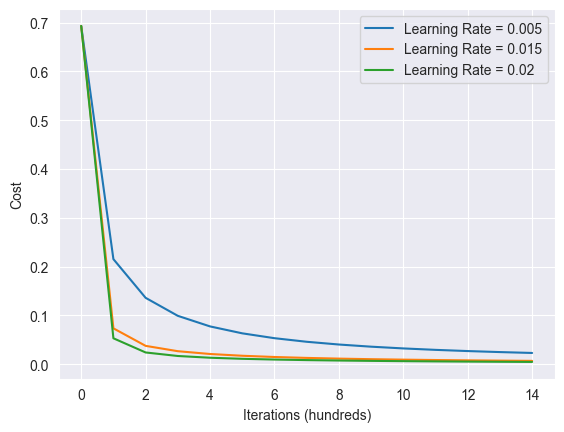

In [234]:
# Sample value of learning rates
learning_rates = [0.005, 0.015, 0.020]
models = {}

# Train models with the sampled learning rates
for lr in learning_rates:
    print(f"Training a model with learning rate: {lr}")
    models[lr] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print('----------------------------------------------------' + '\n')

# Plot Iterations against costs
for lr in learning_rates:
    costs = models[lr]["costs"]
    label = f"Learning Rate = {lr}"
    plt.plot(costs, label=label)

# Labels
plt.ylabel('Cost')
plt.xlabel('Iterations (hundreds)')
plt.legend()
plt.show()

# We can see that increasing the iteration count for larger values of
# the learning rate leads to a plateau at around 800- 900 iterations.

In [ ]:
# This notebook has taught me the intuition behind forward and back propagation using a vectorized approach
# and using the predictions and gradients to optimize weights to decrease a loss function.
# This will come in handy when I go on to implement Neural Networks.